**Avec réentrainement**

entrainement pour detecter 13 objet soit si c une pomme, une cerise , une orange , un 7up, Alexandre Abel, du Nesquik au chocolat, du Nesquik au fraise, un chocolat Skor,une coffee crisp , de la sauce hot chicken ,du thon Rio mare ,de la moutarde ou du deodorant Axe

fait avec le dataset de 20 000 image par element (28 640 en vrai

test=5800 train=20 000 validation =2840)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#os.chdir("/content/gdrive/MyDrive/fruitsPommeCeriseOrange")  #sert a définir le chemin ou le dossier de travail dans google drive. 
#sys.path.append("/content/gdrive/MyDrive/fruitsPommeCeriseOrange") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


import numpy as np
import os
import PIL

from tensorflow import keras  #note: selon la version de tensorflow , python et d'autre chose L'importation de Keras peut s'écrire différanment il y a genre 4 , 5 facon de faire pour l'importer 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_height, img_width = 32, 32   #il faut que les deux nombre soit egal pour faire des image carrer 
                         #avant cetais 32 , 32
                       #je crois que c la taille qui va mettre nos image pour lentrainement
                       #plus le nombre est gros plus sa  peut donner des modele precis mais c plus lourd a entrainer  (je crois a verifier si c vraiment sa) 

batch_size = 20    # cest le nombre dimage quon va envoyer a notre modele en meme temps
                   #en gros pour optimiser le modele au lieux denvoyer une image a la fois on en envoir 20 dans cette exemple

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange6/train",
   # "fruitsPommeCeriseOrange/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
#je coit quon peut ajouter aussi les methode prefaite 
#data_dir     yer deja la dans lexemple le data directory c le  "/content/drive/MyDrive/fruitsPommeCeriseOrange3/train",
#validation_split  = 0.2,
#subset = "training",
#seed=42,
#en plus de ceux deja present comme dans lexemple image_size = (img_height, img_width),  et    batch_size = batch_size

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange6/validation",
   # "fruitsPommeCeriseOrange/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange6/test",
    #"fruitsPommeCeriseOrange/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 208 files belonging to 13 classes.
Found 208 files belonging to 13 classes.
Found 208 files belonging to 13 classes.


detecte 13 objets

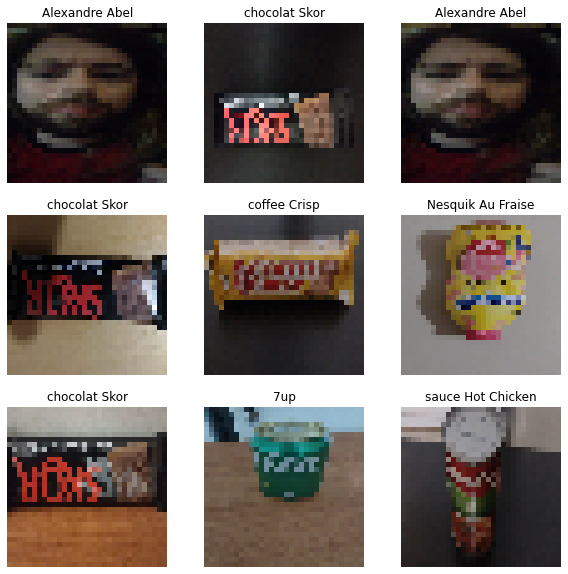

In [ ]:
class_names = ["7up","Alexandre Abel","Nesquik au chocolat", "Nesquik Au Fraise", "chocolat Skor","coffee Crisp","deodorant Axe","moutarde","oignon espagnol","orange","pomme","sauce Hot Chicken","thon Rio Mare"]
#un 7up, du Nesquik au fraise, un chocolat Skor,une coffee crisp , de la sauce hot chicken ,du thon Rio mare ,de la moutarde ou du deodorant Axe
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(13)  # je crois que ici le nombre reprersente le nombre de classe detectable anciennement cetait 3
                                 #sa peut donner une erreur lors de lentrainement si c pas le meme nombre de classe dans le layers.Dense qu'il y a réellement
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    #loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs=30  #etait a 10
hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Augmentation des données**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualisons à quoi ressemblent quelques exemples augmentés en appliquant plusieurs fois l'augmentation de données à la même image :

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Abandonner**

Une autre technique pour réduire le surajustement consiste à introduire une régularisation des abandons dans le réseau.

Lorsque vous appliquez une suppression à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. L'abandon prend un nombre fractionnaire comme valeur d'entrée, sous la forme de 0,1, 0,2, 0,4, etc. Cela signifie abandonner 10 %, 20 % ou 40 % des unités de sortie au hasard de la couche appliquée.

Créons un nouveau réseau de neurones avec tf.keras.layers.Dropout avant de l'entraîner à l'aide des images augmentées :

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiler et entraîner le modèle

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 20  #etait a 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Visualisez les résultats de l'entraînement

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

conversion du model en model tensorflow lite pour une utilisation sur android

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelPomme11Objet1.tflite", 'wb') as f:
  f.write(tflite_model)